# Forecasting models
EDA, feature engineering, feature selection and model development.

## Basic EDA

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pickle

path = '../'

In [3]:
def load_data(code):
    file = path + 'data/clean/' + code + '_clean.pkl'
    with open(file, 'rb') as f:
        df = pickle.load(f)
    return df

In [4]:
def do_basic_eda(code):
    data = load_data(code)
    print('\nINFORMATION ON THE DATAFRAME')
    display(data.info())

    print('\nNaN VALUES')
    display(data.isna().sum())

    # calculate correlations and show
    print('\nCORRELATION COEFFICIENTS (absolute values)')
    display(np.abs(data.corr()).style.background_gradient(cmap='coolwarm'))

    # plot energy prices
    print('\nENERGY PRICES EVOLUTION')
    data['DayAheadPrice'].plot(figsize=[15,6])
    plt.show()

    # get biggest energy sources
    print('\nSOURCES OF ENEGY')
    gen_cols = []
    for col in data.columns:
        if col[:3] == 'Gen':
            gen_cols.append(col)
    gen = data[gen_cols].sum().sort_values(ascending=False)
    display(gen)

    data[gen.index[:4]].plot(figsize=[15,10])
    plt.show()    


In [5]:
load_data('SI')

,DayAheadPrice,GenBiomass,GenFossilBrownCoal,GenFossilGas,GenFossilOil,GenHydroPumped,GenHydroRiver,GenNuclear,GenSolar,GenWaste,GenWind,ImportAT,ImportHR,ImportIT_NORD,LoadForecast,LoadActual,Temperature,Precipitation,SolarRad,PowerUnavailable
2022-01-01 00:00:00+00:00,51.44,7.0,207.0,56.0,0.0,0.0,96.0,693.0,0.0,11.0,0.0,1249.0,732.0,0.0,1056.0,1127.0,-0.1,0.0,0,539.0
2022-01-01 01:00:00+00:00,55.91,7.0,207.0,55.0,0.0,0.0,94.0,693.0,0.0,11.0,0.0,749.0,735.0,0.0,1008.0,1083.0,0.4,0.0,0,539.0
2022-01-01 02:00:00+00:00,46.94,7.0,207.0,55.0,0.0,0.0,94.0,693.0,0.0,11.0,0.0,1464.0,717.0,0.0,976.0,1053.0,0.7,0.0,0,539.0
2022-01-01 03:00:00+00:00,37.67,7.0,205.0,58.0,0.0,0.0,94.0,693.0,0.0,11.0,0.0,1279.0,676.0,0.0,973.0,1047.0,1.1,0.0,0,539.0
2022-01-01 04:00:00+00:00,39.70,6.0,206.0,60.0,0.0,0.0,103.0,693.0,0.0,11.0,0.0,1149.0,769.0,0.0,998.0,1066.0,1.1,0.0,0,539.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 19:00:00+00:00,174.76,8.0,344.0,66.0,0.0,131.0,614.0,698.0,0.0,12.0,2.0,2238.0,427.0,0.0,1853.0,1896.0,0.4,0.0,0,0.0
2023-02-28 20:00:00+00:00,160.02,8.0,304.0,65.0,0.0,0.0,534.0,698.0,0.0,12.0,2.0,1663.0,609.0,0.0,1699.0,1752.0,0.3,0.0,0,539.0
2023-02-28 21:00:00+00:00,154.98,8.0,288.0,63.0,0.0,0.0,444.0,698.0,0.0,12.0,2.0,906.0,551.0,0.0,1575.0,1622.0,0.2,0.0,0,539.0
2023-02-28 22:00:00+00:00,144.79,8.0,283.0,60.0,0.0,0.0,297.0,698.0,0.0,12.0,2.0,411.0,784.0,0.0,1471.0,1510.0,0.1,0.0,0,0.0


### Slovenia
Everything looks fine.


INFORMATION ON THE DATAFRAME
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10171 entries, 2022-01-01 00:00:00+00:00 to 2023-02-28 23:00:00+00:00
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DayAheadPrice       10171 non-null  float64
 1   GenBiomass          10171 non-null  float64
 2   GenFossilBrownCoal  10171 non-null  float64
 3   GenFossilGas        10171 non-null  float64
 4   GenFossilOil        10171 non-null  float64
 5   GenHydroPumped      10171 non-null  float64
 6   GenHydroRiver       10171 non-null  float64
 7   GenNuclear          10171 non-null  float64
 8   GenSolar            10171 non-null  float64
 9   GenWaste            10171 non-null  float64
 10  GenWind             10171 non-null  float64
 11  ImportAT            10171 non-null  float64
 12  ImportHR            10171 non-null  float64
 13  ImportIT_NORD       10171 non-null  float64
 14  LoadForecast        10171

None


NaN VALUES


DayAheadPrice         0
GenBiomass            0
GenFossilBrownCoal    0
GenFossilGas          0
GenFossilOil          0
GenHydroPumped        0
GenHydroRiver         0
GenNuclear            0
GenSolar              0
GenWaste              0
GenWind               0
ImportAT              0
ImportHR              0
ImportIT_NORD         0
LoadForecast          0
LoadActual            0
Temperature           0
Precipitation         0
SolarRad              0
PowerUnavailable      0
dtype: int64


CORRELATION COEFFICIENTS (absolute values)


,DayAheadPrice,GenBiomass,GenFossilBrownCoal,GenFossilGas,GenFossilOil,GenHydroPumped,GenHydroRiver,GenNuclear,GenSolar,GenWaste,GenWind,ImportAT,ImportHR,ImportIT_NORD,LoadForecast,LoadActual,Temperature,Precipitation,SolarRad,PowerUnavailable
DayAheadPrice,1.000000,0.084100,0.291125,0.039672,0.140252,0.196822,0.141604,0.112934,0.066834,0.154544,0.043991,0.159860,0.150676,0.111184,0.179978,0.186733,0.413251,0.023331,0.089292,0.097201
GenBiomass,0.084100,1.000000,0.392677,0.059684,0.003661,0.057846,0.059403,0.547666,0.135516,0.109365,0.006385,0.054481,0.011859,0.059467,0.077032,0.076951,0.074380,0.013565,0.174793,0.219997
GenFossilBrownCoal,0.291125,0.392677,1.000000,0.304299,0.092673,0.184924,0.084964,0.299829,0.066751,0.171412,0.032500,0.074306,0.087222,0.024279,0.481252,0.486184,0.075477,0.060459,0.082331,0.236346
GenFossilGas,0.039672,0.059684,0.304299,1.000000,0.202828,0.212688,0.091387,0.145729,0.188212,0.212861,0.077755,0.134679,0.187749,0.003775,0.532401,0.530478,0.665615,0.024628,0.199930,0.183767
GenFossilOil,0.140252,0.003661,0.092673,0.202828,1.000000,0.073949,0.061252,0.021705,0.002236,0.016431,0.000532,0.031783,0.014588,0.005922,0.110132,0.109342,0.065766,0.014142,0.010716,0.032277
GenHydroPumped,0.196822,0.057846,0.184924,0.212688,0.073949,1.000000,0.543557,0.024280,0.156548,0.024815,0.031395,0.080344,0.216569,0.023975,0.415775,0.419187,0.071747,0.006857,0.146712,0.017492
GenHydroRiver,0.141604,0.059403,0.084964,0.091387,0.061252,0.543557,1.000000,0.069148,0.137848,0.081440,0.032171,0.062523,0.220921,0.023506,0.443632,0.442007,0.000451,0.126965,0.154740,0.005277
GenNuclear,0.112934,0.547666,0.299829,0.145729,0.021705,0.024280,0.069148,1.000000,0.008242,0.199235,0.046218,0.314505,0.119429,0.040518,0.197589,0.200799,0.162250,0.028607,0.044521,0.545809
GenSolar,0.066834,0.135516,0.066751,0.188212,0.002236,0.156548,0.137848,0.008242,1.000000,0.038406,0.093371,0.101606,0.140961,0.022458,0.177651,0.134899,0.417538,0.094878,0.868175,0.029265
GenWaste,0.154544,0.109365,0.171412,0.212861,0.016431,0.024815,0.081440,0.199235,0.038406,1.000000,0.010055,0.020441,0.070842,0.012443,0.246771,0.259549,0.262798,0.059194,0.027297,0.222682



ENERGY PRICES EVOLUTION


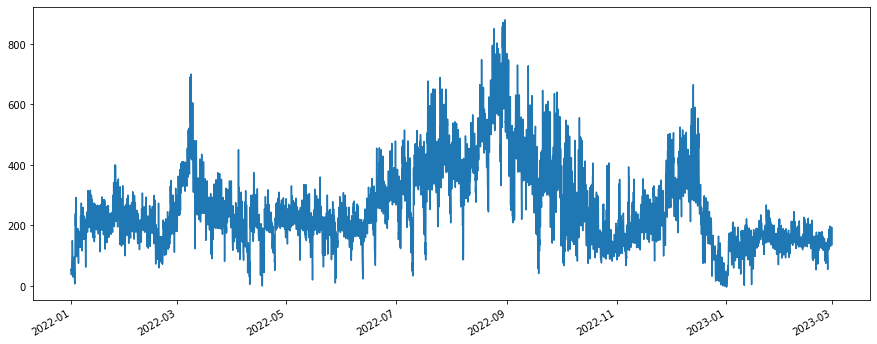


SOURCES OF ENEGY


GenNuclear            6297133.0
GenHydroRiver         3585423.0
GenFossilBrownCoal    3248161.0
GenFossilGas           544398.0
GenHydroPumped         297070.0
GenSolar               286140.0
GenWaste               106859.0
GenBiomass              72540.0
GenWind                  4277.0
GenFossilOil             1660.0
dtype: float64

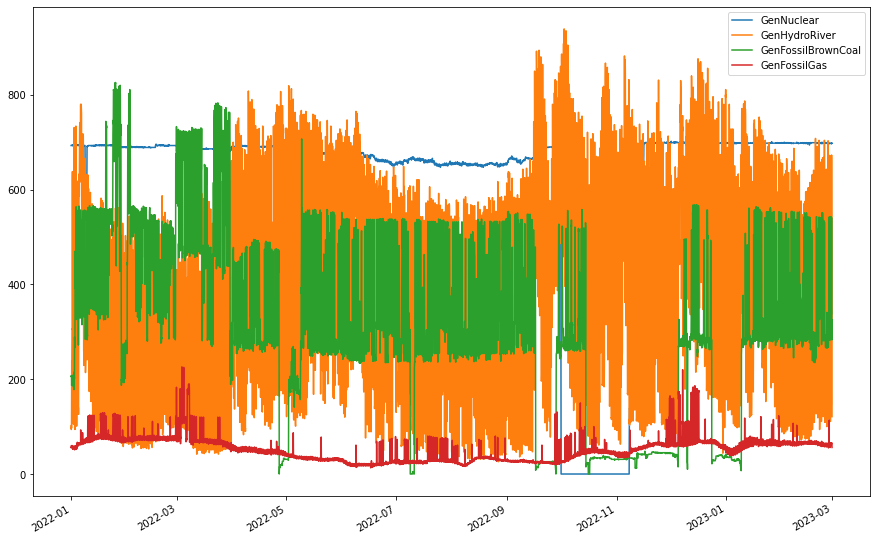

In [6]:
do_basic_eda('SI')

### Croatia
Everything looks fine.


INFORMATION ON THE DATAFRAME
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10176 entries, 2022-01-01 00:00:00+00:00 to 2023-02-28 23:00:00+00:00
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DayAheadPrice           10176 non-null  float64
 1   GenBiomass              10176 non-null  float64
 2   GenFossilGas            10176 non-null  float64
 3   GenFossilHardCoal       10176 non-null  float64
 4   GenFossilOil            10176 non-null  float64
 5   GenGeothermal           10176 non-null  float64
 6   GenHydroPumped          10176 non-null  float64
 7   GenHydroPumpedConsumed  10176 non-null  float64
 8   GenHydroRiver           10176 non-null  float64
 9   GenHydroReservoir       10176 non-null  float64
 10  GenOtherRenewable       10176 non-null  float64
 11  GenSolar                10176 non-null  float64
 12  GenWaste                10176 non-null  float64
 13  GenWind       

None


NaN VALUES


DayAheadPrice             0
GenBiomass                0
GenFossilGas              0
GenFossilHardCoal         0
GenFossilOil              0
GenGeothermal             0
GenHydroPumped            0
GenHydroPumpedConsumed    0
GenHydroRiver             0
GenHydroReservoir         0
GenOtherRenewable         0
GenSolar                  0
GenWaste                  0
GenWind                   0
ImportBA                  0
ImportHU                  0
ImportRS                  0
ImportSI                  0
LoadForecast              0
LoadActual                0
Temperature               0
Precipitation             0
SolarRad                  0
dtype: int64


CORRELATION COEFFICIENTS (absolute values)


,DayAheadPrice,GenBiomass,GenFossilGas,GenFossilHardCoal,GenFossilOil,GenGeothermal,GenHydroPumped,GenHydroPumpedConsumed,GenHydroRiver,GenHydroReservoir,GenOtherRenewable,GenSolar,GenWaste,GenWind,ImportBA,ImportHU,ImportRS,ImportSI,LoadForecast,LoadActual,Temperature,Precipitation,SolarRad
DayAheadPrice,1.000000,0.289857,0.187622,0.100903,0.115898,0.026016,0.018560,0.262030,0.038025,0.104914,0.006939,0.094455,0.178145,0.063229,0.346719,0.328076,0.256864,0.113484,0.351960,0.389386,0.425342,0.005773,0.091538
GenBiomass,0.289857,1.000000,0.049566,0.123393,0.034519,0.125085,0.162962,0.046164,0.110723,0.294229,0.338023,0.118501,0.100963,0.134815,0.027576,0.037848,0.061435,0.103992,0.075378,0.067725,0.449860,0.003387,0.107169
GenFossilGas,0.187622,0.049566,1.000000,0.016818,0.189978,0.209147,0.053555,0.093452,0.185225,0.012651,0.131380,0.043960,0.096609,0.020835,0.134983,0.109197,0.175983,0.114011,0.322507,0.319614,0.067562,0.019089,0.039247
GenFossilHardCoal,0.100903,0.123393,0.016818,1.000000,0.236539,0.148858,0.140481,0.001409,0.005222,0.133043,0.081679,0.031066,0.039292,0.114466,0.099990,0.028824,0.087369,0.049343,0.000001,0.016857,0.194692,0.011291,0.016750
GenFossilOil,0.115898,0.034519,0.189978,0.236539,1.000000,0.071753,0.034609,0.024414,0.010588,0.117288,0.161620,0.025713,0.114929,0.047253,0.061527,0.029923,0.018899,0.046133,0.098585,0.086112,0.149340,0.021890,0.011411
GenGeothermal,0.026016,0.125085,0.209147,0.148858,0.071753,1.000000,0.114072,0.052099,0.070487,0.030126,0.310577,0.018874,0.251232,0.015356,0.038702,0.095037,0.135201,0.009090,0.104713,0.093041,0.068878,0.004682,0.043001
GenHydroPumped,0.018560,0.162962,0.053555,0.140481,0.034609,0.114072,1.000000,0.210237,0.483662,0.676343,0.187951,0.205322,0.189389,0.010952,0.239762,0.448043,0.279508,0.019440,0.355075,0.336454,0.334609,0.105870,0.206931
GenHydroPumpedConsumed,0.262030,0.046164,0.093452,0.001409,0.024414,0.052099,0.210237,1.000000,0.294004,0.199275,0.039081,0.220215,0.039085,0.028986,0.112759,0.247719,0.138466,0.116082,0.470396,0.479672,0.155904,0.037301,0.184038
GenHydroRiver,0.038025,0.110723,0.185225,0.005222,0.010588,0.070487,0.483662,0.294004,1.000000,0.592693,0.060330,0.016464,0.149734,0.058719,0.099693,0.426886,0.114501,0.172342,0.425902,0.417649,0.072809,0.120697,0.032247
GenHydroReservoir,0.104914,0.294229,0.012651,0.133043,0.117288,0.030126,0.676343,0.199275,0.592693,1.000000,0.082522,0.133836,0.041907,0.110648,0.240781,0.473675,0.284180,0.095035,0.569046,0.546957,0.521513,0.059251,0.130974



ENERGY PRICES EVOLUTION


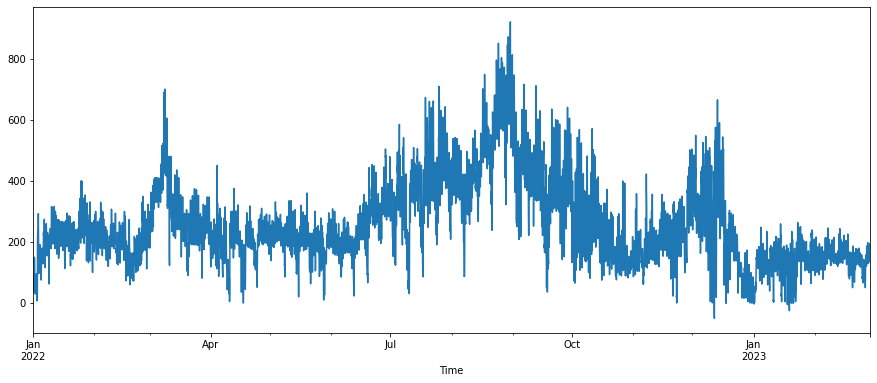


SOURCES OF ENEGY


GenHydroReservoir         4258370.0
GenFossilGas              3810298.0
GenWind                   2784073.0
GenFossilHardCoal         1648923.0
GenHydroRiver             1438113.0
GenBiomass                 735817.0
GenHydroPumped             548333.0
GenOtherRenewable          367402.0
GenHydroPumpedConsumed     220872.0
GenSolar                   101421.0
GenGeothermal               69377.0
GenWaste                    53528.0
GenFossilOil                29495.0
dtype: float64

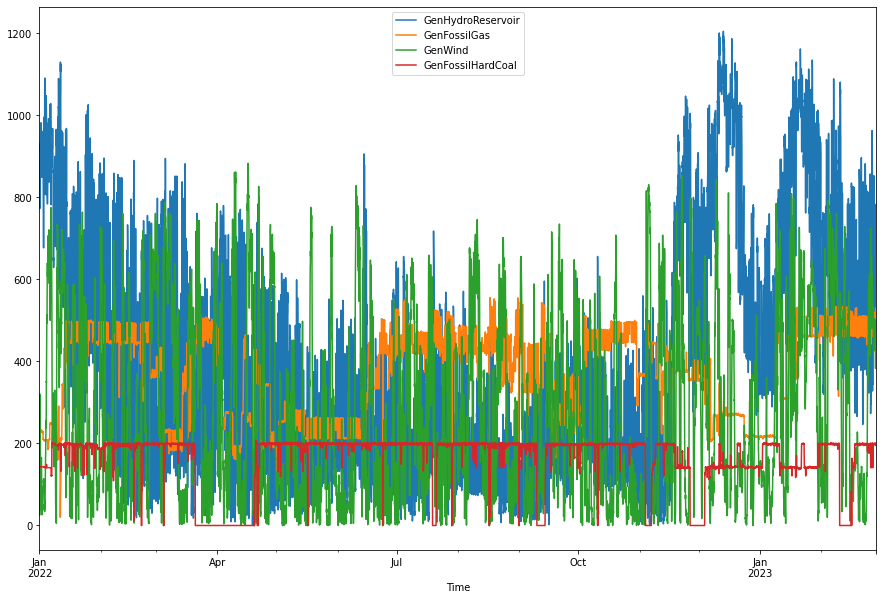

In [7]:
do_basic_eda('HR')

### Serbia
There are many NaN values, all in the power generaton columns. We have to fix that.


INFORMATION ON THE DATAFRAME
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10079 entries, 2022-01-01 00:00:00+00:00 to 2023-02-28 23:00:00+00:00
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DayAheadPrice       10079 non-null  float64
 1   GenBiomass          9959 non-null   float64
 2   GenFossilBrownCoal  10079 non-null  float64
 3   GenFossilGas        10079 non-null  float64
 4   GenHydroPumped      10079 non-null  float64
 5   GenHydroRiver       10079 non-null  float64
 6   GenHydroReservoir   10079 non-null  float64
 7   GenOther            9959 non-null   float64
 8   GenWind             8076 non-null   float64
 9   ImportBA            10079 non-null  float64
 10  ImportBG            10079 non-null  float64
 11  ImportHR            10079 non-null  float64
 12  ImportHU            10079 non-null  float64
 13  ImportME            10079 non-null  float64
 14  ImportMK            10079

None


NaN VALUES


DayAheadPrice            0
GenBiomass             120
GenFossilBrownCoal       0
GenFossilGas             0
GenHydroPumped           0
GenHydroRiver            0
GenHydroReservoir        0
GenOther               120
GenWind               2003
ImportBA                 0
ImportBG                 0
ImportHR                 0
ImportHU                 0
ImportME                 0
ImportMK                 0
ImportRO                 0
LoadForecast             0
LoadActual               0
Temperature              0
Precipitation            0
SolarRad                 0
PowerUnavailable         0
dtype: int64


CORRELATION COEFFICIENTS (absolute values)


,DayAheadPrice,GenBiomass,GenFossilBrownCoal,GenFossilGas,GenHydroPumped,GenHydroRiver,GenHydroReservoir,GenOther,GenWind,ImportBA,ImportBG,ImportHR,ImportHU,ImportME,ImportMK,ImportRO,LoadForecast,LoadActual,Temperature,Precipitation,SolarRad,PowerUnavailable
DayAheadPrice,1.000000,0.157950,0.175661,0.412800,0.264098,0.274869,0.164539,0.015377,0.214742,0.083462,0.216150,0.197171,0.347868,0.376752,0.088418,0.324440,0.101165,0.057267,0.442687,0.007576,0.104471,0.044191
GenBiomass,0.157950,1.000000,0.087899,0.071067,0.010749,0.121767,0.224410,0.134305,nan,0.476846,0.261616,0.227842,0.323647,0.194034,0.013657,0.142579,0.390367,0.384720,0.395020,0.033513,0.120948,0.378506
GenFossilBrownCoal,0.175661,0.087899,1.000000,0.373876,0.009016,0.070416,0.106448,0.081492,0.004647,0.212131,0.075734,0.229500,0.278138,0.018987,0.008337,0.320920,0.399833,0.426239,0.257104,0.040569,0.136158,0.173097
GenFossilGas,0.412800,0.071067,0.373876,1.000000,0.087625,0.291549,0.051528,0.180023,0.196453,0.115588,0.409061,0.001415,0.057293,0.287631,0.160205,0.120423,0.364689,0.368052,0.497117,0.014931,0.248171,0.046130
GenHydroPumped,0.264098,0.010749,0.009016,0.087625,1.000000,0.190279,0.460497,0.037581,0.174179,0.074786,0.045054,0.054474,0.108728,0.175706,0.120784,0.295947,0.297038,0.349047,0.034065,0.017406,0.155035,0.021155
GenHydroRiver,0.274869,0.121767,0.070416,0.291549,0.190279,1.000000,0.253297,0.017689,0.113892,0.257681,0.259373,0.051178,0.047113,0.399885,0.234485,0.387404,0.642844,0.640152,0.423448,0.026683,0.030151,0.185229
GenHydroReservoir,0.164539,0.224410,0.106448,0.051528,0.460497,0.253297,1.000000,0.145905,0.170656,0.130630,0.066640,0.015638,0.043105,0.190881,0.023151,0.211492,0.456635,0.538000,0.173469,0.033748,0.119236,0.183499
GenOther,0.015377,0.134305,0.081492,0.180023,0.037581,0.017689,0.145905,1.000000,0.056787,0.042342,0.095638,0.007969,0.026864,0.026705,0.005341,0.002388,0.167011,0.148557,0.145813,0.009908,0.012603,0.169280
GenWind,0.214742,nan,0.004647,0.196453,0.174179,0.113892,0.170656,0.056787,1.000000,0.010232,0.119341,0.053260,0.072058,0.014466,0.119291,0.066561,0.126404,0.113326,0.263841,0.104817,0.199079,0.134354
ImportBA,0.083462,0.476846,0.212131,0.115588,0.074786,0.257681,0.130630,0.042342,0.010232,1.000000,0.175870,0.373435,0.221307,0.342568,0.353791,0.220040,0.259066,0.263671,0.203508,0.017811,0.097905,0.177947



ENERGY PRICES EVOLUTION


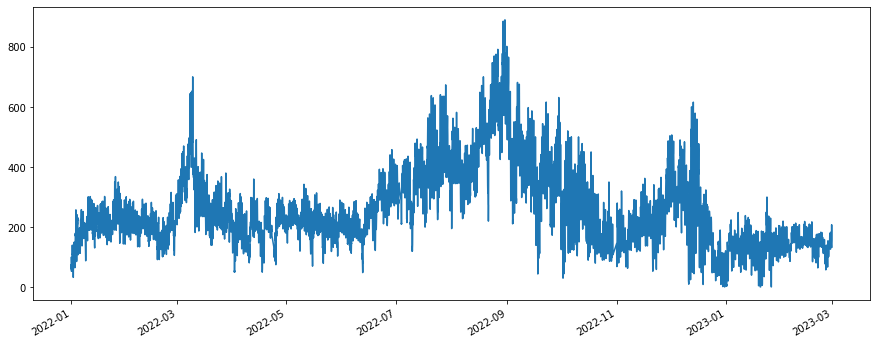


SOURCES OF ENEGY


GenFossilBrownCoal    25126657.0
GenHydroRiver          9889003.0
GenFossilGas           1028683.0
GenWind                 826813.0
GenHydroPumped          717841.0
GenHydroReservoir       687178.0
GenOther                296730.0
GenBiomass              294525.0
dtype: float64

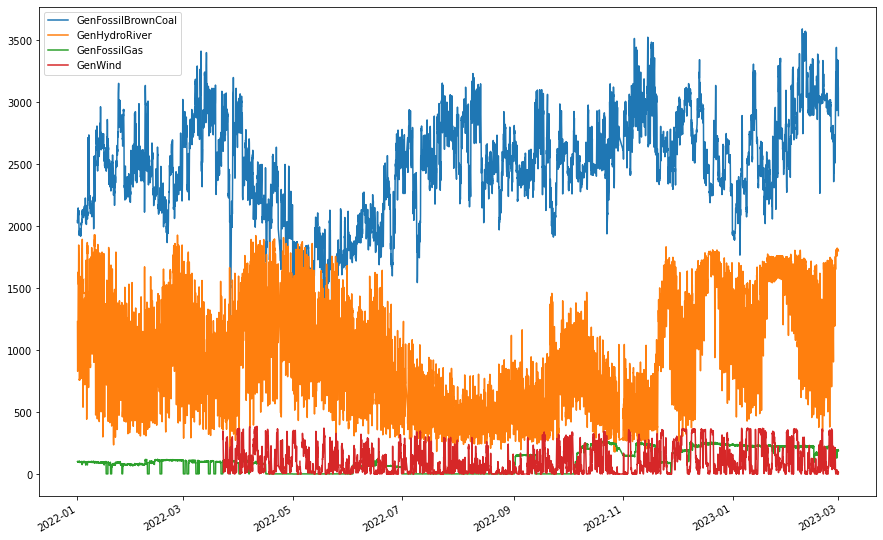

In [8]:
do_basic_eda('RS')

### Romania
Everything looks fine.


INFORMATION ON THE DATAFRAME
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10171 entries, 2022-01-01 00:00:00+00:00 to 2023-02-28 23:00:00+00:00
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DayAheadPrice       10171 non-null  float64
 1   GenBiomass          10171 non-null  float64
 2   GenFossilBrownCoal  10171 non-null  float64
 3   GenFossilGas        10171 non-null  float64
 4   GenFossilHardCoal   10171 non-null  float64
 5   GenHydroRiver       10171 non-null  float64
 6   GenHydroReservoir   10171 non-null  float64
 7   GenNuclear          10171 non-null  float64
 8   GenSolar            10171 non-null  float64
 9   GenWind             10171 non-null  float64
 10  ImportBG            10171 non-null  float64
 11  ImportHU            10171 non-null  float64
 12  ImportRS            10171 non-null  float64
 13  ImportUA            10171 non-null  float64
 14  LoadForecast        10171

None


NaN VALUES


DayAheadPrice         0
GenBiomass            0
GenFossilBrownCoal    0
GenFossilGas          0
GenFossilHardCoal     0
GenHydroRiver         0
GenHydroReservoir     0
GenNuclear            0
GenSolar              0
GenWind               0
ImportBG              0
ImportHU              0
ImportRS              0
ImportUA              0
LoadForecast          0
LoadActual            0
Temperature           0
Precipitation         0
SolarRad              0
PowerUnavailable      0
dtype: int64


CORRELATION COEFFICIENTS (absolute values)


,DayAheadPrice,GenBiomass,GenFossilBrownCoal,GenFossilGas,GenFossilHardCoal,GenHydroRiver,GenHydroReservoir,GenNuclear,GenSolar,GenWind,ImportBG,ImportHU,ImportRS,ImportUA,LoadForecast,LoadActual,Temperature,Precipitation,SolarRad,PowerUnavailable
DayAheadPrice,1.000000,0.003014,0.330473,0.046433,0.019696,0.321728,0.320242,0.076463,0.023924,0.282822,0.594851,0.036242,0.282938,0.068530,0.261732,0.267519,0.412083,0.032999,0.048399,0.379980
GenBiomass,0.003014,1.000000,0.082134,0.187637,0.325350,0.116435,0.088171,0.110519,0.095676,0.152771,0.141331,0.088055,0.224433,0.075662,0.388579,0.388837,0.384676,0.018414,0.115974,0.188794
GenFossilBrownCoal,0.330473,0.082134,1.000000,0.044793,0.038883,0.275723,0.358447,0.225596,0.029868,0.325329,0.423501,0.066575,0.039274,0.098192,0.155102,0.171648,0.231674,0.016427,0.051902,0.288012
GenFossilGas,0.046433,0.187637,0.044793,1.000000,0.106216,0.197648,0.074915,0.179273,0.176561,0.012533,0.133950,0.042986,0.122819,0.090969,0.371984,0.373821,0.373213,0.037171,0.199937,0.324324
GenFossilHardCoal,0.019696,0.325350,0.038883,0.106216,1.000000,0.165703,0.089349,0.150812,0.005602,0.168981,0.036319,0.071316,0.068686,0.011046,0.389091,0.395463,0.189352,0.013069,0.012416,0.188656
GenHydroRiver,0.321728,0.116435,0.275723,0.197648,0.165703,1.000000,0.018659,0.042490,0.018872,0.116598,0.272058,0.090695,0.103174,0.050815,0.328506,0.329635,0.378252,0.011526,0.023262,0.352554
GenHydroReservoir,0.320242,0.088171,0.358447,0.074915,0.089349,0.018659,1.000000,0.350118,0.140947,0.255499,0.208336,0.096777,0.157438,0.117836,0.361201,0.373275,0.303691,0.001253,0.142281,0.344302
GenNuclear,0.076463,0.110519,0.225596,0.179273,0.150812,0.042490,0.350118,1.000000,0.182444,0.194578,0.126561,0.107115,0.082840,0.122554,0.157831,0.153633,0.460504,0.044916,0.192407,0.678231
GenSolar,0.023924,0.095676,0.029868,0.176561,0.005602,0.018872,0.140947,0.182444,1.000000,0.108727,0.147039,0.087944,0.056951,0.060974,0.221246,0.212996,0.416230,0.036116,0.900698,0.237797
GenWind,0.282822,0.152771,0.325329,0.012533,0.168981,0.116598,0.255499,0.194578,0.108727,1.000000,0.203668,0.340088,0.159928,0.294133,0.152714,0.151976,0.277095,0.106346,0.106697,0.271478



ENERGY PRICES EVOLUTION


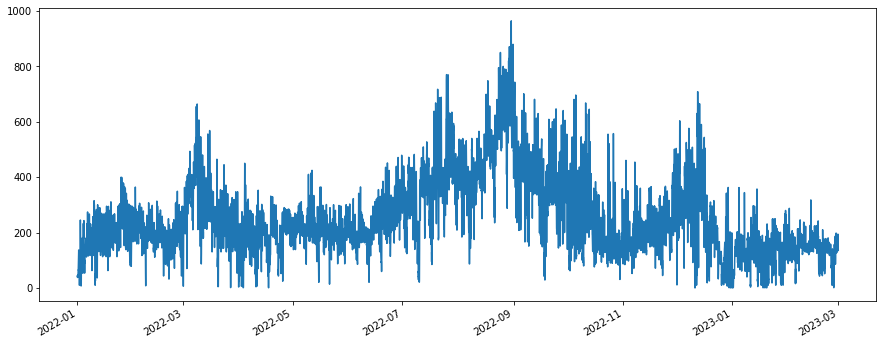


SOURCES OF ENEGY


GenNuclear            13078280.0
GenFossilGas          12948177.0
GenFossilBrownCoal    11444328.0
GenHydroRiver         10599500.0
GenWind                8634174.0
GenHydroReservoir      6324429.0
GenSolar               1487413.0
GenBiomass              648114.0
GenFossilHardCoal       511546.0
dtype: float64

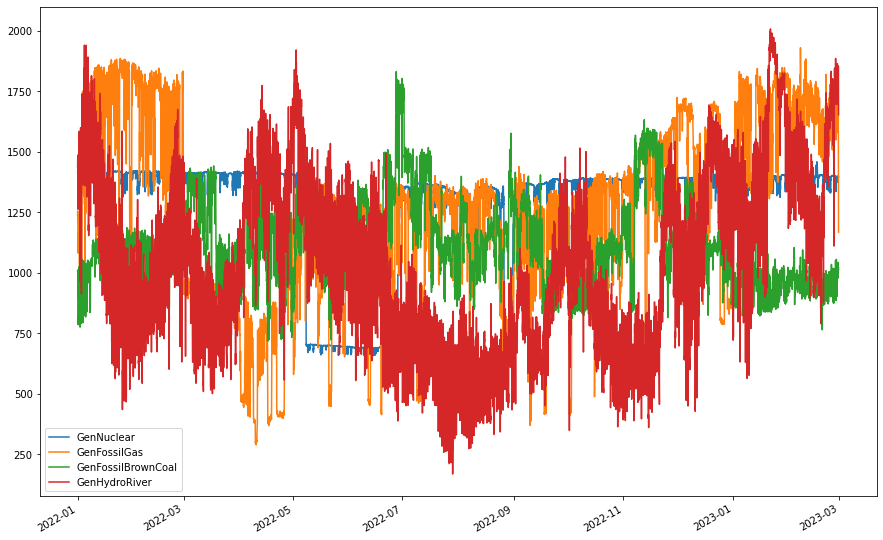

In [9]:
do_basic_eda('RO')

### Bulgaria
There are NaNs again in one of the power generation columns, we have to fix that.


INFORMATION ON THE DATAFRAME
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10175 entries, 2022-01-01 00:00:00+00:00 to 2023-02-28 23:00:00+00:00
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DayAheadPrice       10175 non-null  float64
 1   GenBiomass          10175 non-null  float64
 2   GenFossilBrownCoal  10175 non-null  float64
 3   GenFossilGas        10175 non-null  float64
 4   GenFossilHardCoal   10175 non-null  float64
 5   GenHydroPumped      5566 non-null   float64
 6   GenHydroRiver       10175 non-null  float64
 7   GenHydroReservoir   10175 non-null  float64
 8   GenNuclear          10175 non-null  float64
 9   GenSolar            10175 non-null  float64
 10  GenWaste            10175 non-null  float64
 11  GenWind             10175 non-null  float64
 12  ImportGR            10175 non-null  float64
 13  ImportMK            10175 non-null  float64
 14  ImportRO            10175

None


NaN VALUES


DayAheadPrice            0
GenBiomass               0
GenFossilBrownCoal       0
GenFossilGas             0
GenFossilHardCoal        0
GenHydroPumped        4609
GenHydroRiver            0
GenHydroReservoir        0
GenNuclear               0
GenSolar                 0
GenWaste                 0
GenWind                  0
ImportGR                 0
ImportMK                 0
ImportRO                 0
ImportRS                 0
ImportTR                 0
LoadForecast             0
LoadActual               0
Temperature              0
Precipitation            0
SolarRad                 0
PowerUnavailable         0
dtype: int64


CORRELATION COEFFICIENTS (absolute values)


,DayAheadPrice,GenBiomass,GenFossilBrownCoal,GenFossilGas,GenFossilHardCoal,GenHydroPumped,GenHydroRiver,GenHydroReservoir,GenNuclear,GenSolar,GenWaste,GenWind,ImportGR,ImportMK,ImportRO,ImportRS,ImportTR,LoadForecast,LoadActual,Temperature,Precipitation,SolarRad,PowerUnavailable
DayAheadPrice,1.000000,0.045925,0.165572,0.107363,0.351698,0.008167,0.080553,0.390808,0.028400,0.045452,0.065376,0.213745,0.265018,0.161172,0.432560,0.008608,0.418967,0.103264,0.119202,0.283031,0.030159,0.030902,0.310075
GenBiomass,0.045925,1.000000,0.103261,0.097886,0.071584,0.026174,0.339875,0.103242,0.054113,0.096842,0.141828,0.091922,0.027569,0.015850,0.131499,0.110329,0.027158,0.047943,0.110808,0.031279,0.048603,0.049638,0.095882
GenFossilBrownCoal,0.165572,0.103261,1.000000,0.662763,0.005663,0.057233,0.012876,0.285652,0.256415,0.136554,0.030102,0.133820,0.142421,0.101439,0.146892,0.055531,0.005590,0.726940,0.743641,0.567949,0.068263,0.169223,0.538271
GenFossilGas,0.107363,0.097886,0.662763,1.000000,0.081931,0.051641,0.100262,0.144180,0.424226,0.170353,0.060979,0.351075,0.100763,0.079218,0.207858,0.083184,0.038509,0.713510,0.707998,0.761392,0.035030,0.224955,0.731721
GenFossilHardCoal,0.351698,0.071584,0.005663,0.081931,1.000000,0.008215,0.107700,0.061260,0.133800,0.004136,0.049962,0.004704,0.077442,0.000569,0.107376,0.034673,0.174750,0.011000,0.008756,0.131822,0.009010,0.004612,0.116498
GenHydroPumped,0.008167,0.026174,0.057233,0.051641,0.008215,1.000000,0.036190,0.144601,0.045542,0.048700,0.002797,0.071172,0.007901,0.007162,0.008253,0.002324,0.014774,0.104956,0.098705,0.043658,0.016113,0.038519,0.087736
GenHydroRiver,0.080553,0.339875,0.012876,0.100262,0.107700,0.036190,1.000000,0.394733,0.170932,0.016295,0.046121,0.059471,0.028791,0.054739,0.234981,0.084994,0.052434,0.046823,0.081769,0.153225,0.092713,0.030263,0.030707
GenHydroReservoir,0.390808,0.103242,0.285652,0.144180,0.061260,0.144601,0.394733,1.000000,0.085225,0.182484,0.008656,0.035650,0.023726,0.005350,0.199579,0.039071,0.078768,0.453145,0.476575,0.008908,0.024049,0.120949,0.050956
GenNuclear,0.028400,0.054113,0.256415,0.424226,0.133800,0.045542,0.170932,0.085225,1.000000,0.062901,0.067785,0.225524,0.139771,0.208572,0.007441,0.241173,0.075168,0.389831,0.393378,0.252809,0.032536,0.076336,0.623431
GenSolar,0.045452,0.096842,0.136554,0.170353,0.004136,0.048700,0.016295,0.182484,0.062901,1.000000,0.008595,0.106997,0.014701,0.032339,0.207641,0.065347,0.013502,0.005088,0.032916,0.342807,0.044298,0.837296,0.140754



ENERGY PRICES EVOLUTION


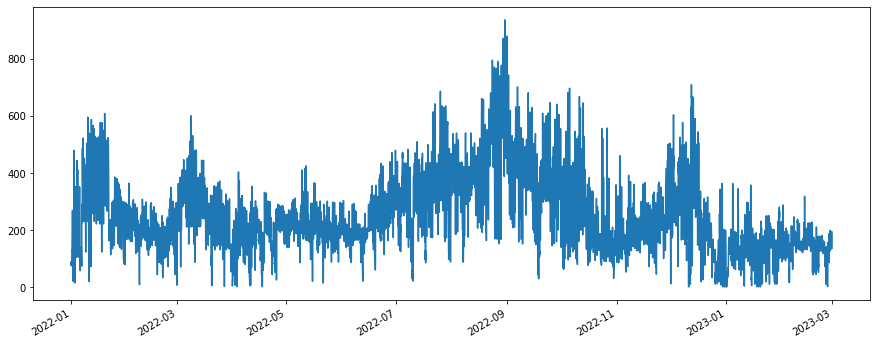


SOURCES OF ENEGY


GenFossilBrownCoal    26929654.0
GenNuclear            19531931.0
GenFossilGas           3137864.0
GenHydroReservoir      2681162.0
GenSolar               1852149.0
GenWind                1742690.0
GenHydroRiver          1563781.0
GenFossilHardCoal       617864.0
GenBiomass              286458.0
GenWaste                 39350.0
GenHydroPumped            6866.0
dtype: float64

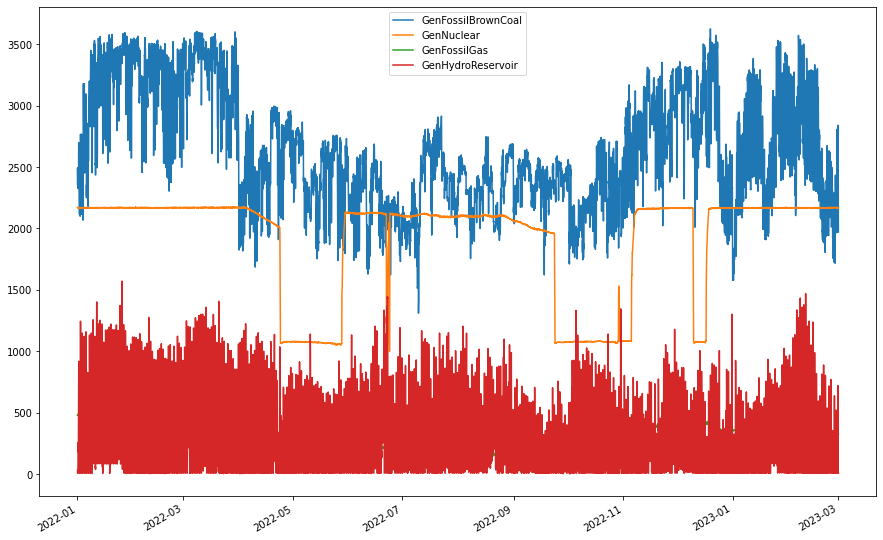

In [10]:
do_basic_eda('BG')

### Greece
There are a few NaNs again in some generation columns, we have to fix that.


INFORMATION ON THE DATAFRAME
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10174 entries, 2022-01-01 00:00:00+00:00 to 2023-02-28 23:00:00+00:00
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DayAheadPrice       10174 non-null  float64
 1   GenFossilBrownCoal  10172 non-null  float64
 2   GenFossilGas        10172 non-null  float64
 3   GenFossilOil        10172 non-null  float64
 4   GenHydroPumped      10172 non-null  float64
 5   GenHydroReservoir   10172 non-null  float64
 6   GenSolar            10174 non-null  float64
 7   GenWind             10174 non-null  float64
 8   ImportAL            10174 non-null  float64
 9   ImportBG            10174 non-null  float64
 10  ImportMK            10174 non-null  float64
 11  ImportTR            10174 non-null  float64
 12  LoadForecast        10174 non-null  float64
 13  LoadActual          10174 non-null  float64
 14  Temperature         10174

None


NaN VALUES


DayAheadPrice         0
GenFossilBrownCoal    2
GenFossilGas          2
GenFossilOil          2
GenHydroPumped        2
GenHydroReservoir     2
GenSolar              0
GenWind               0
ImportAL              0
ImportBG              0
ImportMK              0
ImportTR              0
LoadForecast          0
LoadActual            0
Temperature           0
Precipitation         0
SolarRad              0
PowerUnavailable      0
dtype: int64


CORRELATION COEFFICIENTS (absolute values)


/home/kevinsteiner/.local/lib/python3.8/site-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/kevinsteiner/.local/lib/python3.8/site-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,DayAheadPrice,GenFossilBrownCoal,GenFossilGas,GenFossilOil,GenHydroPumped,GenHydroReservoir,GenSolar,GenWind,ImportAL,ImportBG,ImportMK,ImportTR,LoadForecast,LoadActual,Temperature,Precipitation,SolarRad,PowerUnavailable
DayAheadPrice,1.000000,0.364308,0.572575,nan,0.338469,0.356101,0.109391,0.244503,0.180168,0.313058,0.263217,0.150253,0.298150,0.315993,0.381912,0.004811,0.044983,0.238043
GenFossilBrownCoal,0.364308,1.000000,0.569532,nan,0.069876,0.230546,0.012154,0.086724,0.207952,0.356386,0.354051,0.165441,0.505112,0.515539,0.041237,0.020706,0.000333,0.171564
GenFossilGas,0.572575,0.569532,1.000000,nan,0.328950,0.459317,0.149847,0.310910,0.258636,0.445467,0.464645,0.082306,0.569554,0.603321,0.189805,0.013128,0.069030,0.168317
GenFossilOil,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
GenHydroPumped,0.338469,0.069876,0.328950,nan,1.000000,0.655063,0.256587,0.024979,0.019362,0.157798,0.098495,0.089483,0.340371,0.337456,0.157411,0.019909,0.187584,0.046362
GenHydroReservoir,0.356101,0.230546,0.459317,nan,0.655063,1.000000,0.177393,0.074411,0.002397,0.259021,0.207286,0.057951,0.555341,0.565711,0.018005,0.038993,0.145534,0.080069
GenSolar,0.109391,0.012154,0.149847,nan,0.256587,0.177393,1.000000,0.049271,0.216748,0.225042,0.240346,0.155346,0.356426,0.335578,0.348687,0.023299,0.861719,0.002933
GenWind,0.244503,0.086724,0.310910,nan,0.024979,0.074411,0.049271,1.000000,0.191091,0.181200,0.259275,0.127532,0.053695,0.029260,0.108308,0.062236,0.051199,0.039715
ImportAL,0.180168,0.207952,0.258636,nan,0.019362,0.002397,0.216748,0.191091,1.000000,0.310202,0.711260,0.088012,0.173747,0.167407,0.298150,0.002308,0.236869,0.339027
ImportBG,0.313058,0.356386,0.445467,nan,0.157798,0.259021,0.225042,0.181200,0.310202,1.000000,0.641982,0.631479,0.364087,0.351536,0.263045,0.037393,0.203509,0.071940



ENERGY PRICES EVOLUTION


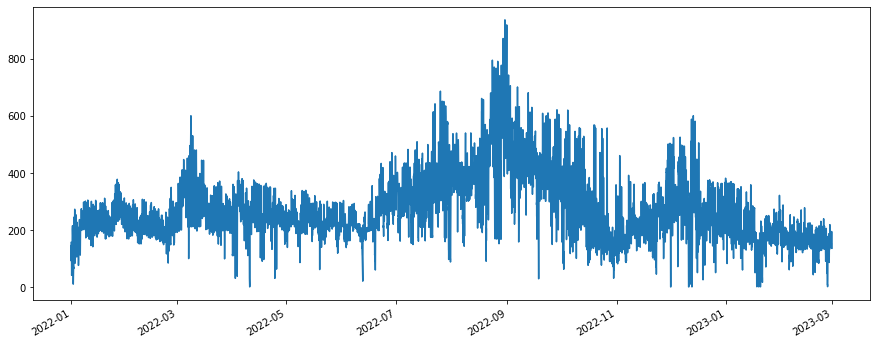


SOURCES OF ENEGY


GenFossilGas          21008682.0
GenWind               10990277.0
GenFossilBrownCoal     6628407.0
GenSolar               6428797.0
GenHydroReservoir      3943120.0
GenHydroPumped          724227.0
GenFossilOil                 0.0
dtype: float64

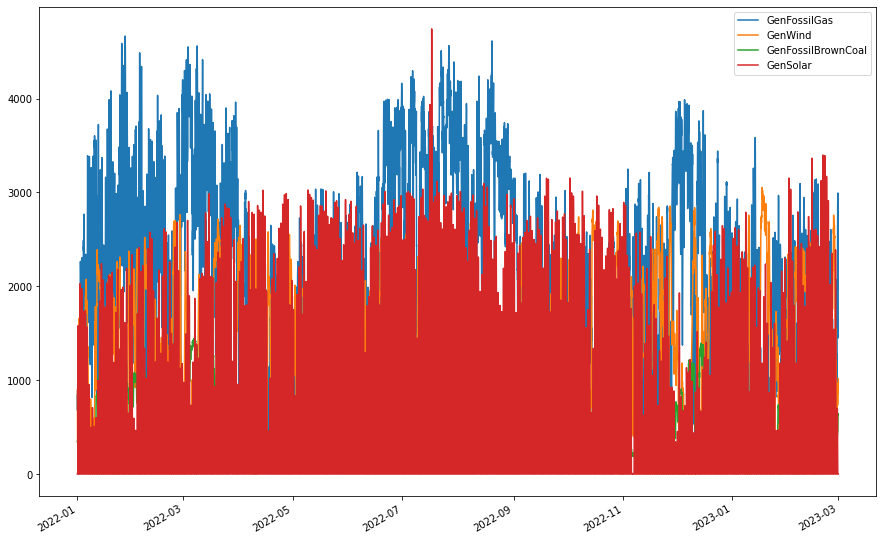

In [11]:
do_basic_eda('GR')

## Feature engineering
Add generic new features to existing data.

In [12]:
def add_general_new_features(data):
    # price-n features
    data['Price-1'] = data['DayAheadPrice'].shift(1)
    data['Price-2'] = data['DayAheadPrice'].shift(2)
    data['Price-24'] = data['DayAheadPrice'].shift(24)

    # consumption, cons-n features
    data['Load-1'] = data['LoadActual'].shift(1)
    data['Load-24'] = data['LoadActual'].shift(24)

    data.drop('LoadForecast', axis=1, inplace=True)

    # totals
    gen_cols = []
    imp_cols = []
    fossil_cols = []
    for col in data.columns:
        if col[:3] == 'Gen':
            gen_cols.append(col)
        if col[:6] == 'Import':
            imp_cols.append(col)
        if col[:9] == 'GenFossil':
            fossil_cols.append(col) 

    data['GenTotal'] = data[gen_cols].sum(axis=1)
    data['ImportTotal'] = data[imp_cols].sum(axis=1)
    data['GenFossilTotal'] = data[fossil_cols].sum(axis=1)
    
    # time
    data['Hour'] = data.index.hour
    data['Month'] = data.index.month
    data.dropna(axis=0, inplace=True)
    


In [13]:
data_si = load_data('SI')
add_general_new_features(data_si)

data_hr = load_data('HR')
add_general_new_features(data_hr)

data_rs = load_data('RS')
data_rs.fillna(0, inplace=True) # quick fix
add_general_new_features(data_rs)

data_ro = load_data('RO')
add_general_new_features(data_ro)

data_bg = load_data('BG')
data_bg.fillna(0, inplace=True)  # quick fix
add_general_new_features(data_bg)

data_gr = load_data('GR')
data_gr.fillna(0, inplace=True)  # quick fix
add_general_new_features(data_gr)

codes = ['SI', 'HR', 'RS', 'RO', 'GR', 'BG']

for c in codes:
    df = load_data(c)
    add_general_new_features(df)
    fname = path + 'data/augumented/' + c + '.pkl'
    with open(fname, 'wb') as f:
        pickle.dump(df, f)

## Feature selection and models
Feature selection is based on mutual information.

In [14]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [15]:
def get_best_features(data, n_features):
    """
    Do feature selection.
    """
    val = mutual_info_regression(data.values[:,1:], data.values[:,0])
    mi = pd.Series(val, index=data.columns[1:])
    return mi.sort_values(ascending=False)[:n_features].index

def tt_split(data_country, features):
    y = data_country['DayAheadPrice']
    x = data_country[features]
    return train_test_split(x, y, test_size=0.3)

def get_errors(test, predictions):
    MBE = np.mean(test - predictions)
    RMSE = np.sqrt(metrics.mean_squared_error(test, predictions))
    cvRMSE = RMSE / np.mean(test)
    NMBE = MBE / np.mean(test)
    R2 = metrics.r2_score(test, predictions)
    labels = [
        'Root mean squared error', 
        'Coefficient of variation RMSE', 
        'Normalized mean bias error',
        'R2 score'
    ]
    return pd.Series([RMSE, cvRMSE, NMBE, R2], index=labels)


def rescale(df):
    """
    Normalization (Z) of the data.
    """
    means = []
    stds = []

    for col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        
        df[col] = (df[col] - mean) / std
        means.append(mean)
        stds.append(std)
    
    return df, pd.DataFrame({'Mean': means, 'Std': stds}, index=df.columns)

def plot_predictions(test, predictions):
    fig, ax = plt.subplots(1,2, figsize=[14,5])
    ax[0].plot(test, label='data')
    ax[0].plot(predictions, label='predictions')
    ax[1].plot(test[:60], label='data')
    ax[1].plot(predictions[:60], label='predictions')

    ax[0].legend()
    plt.show()

In [16]:
def train_model_country(model_type, data_country, n_features, model_parameters=None):
    """
    Train a ML model. This function does the following:
        1. rescales the input data
        2. train test split
        3. feature selection on the training data
        4. train the model: either NN or RF
    
    Parameters:
        model_type: 'rf' | 'nn', str
            type of the model to train, 'rf' for random forest and 'nn' for neural network
        data_country: DataFrame
            cleaned data for a given country (no Nans etc)
        n_features: int
            number of best features to select
        model_parameters: dict
            dictionary with model parameters, which are parameters for either 
            MLPRegressor or RandomForestRegressor from sklearn
    
    
    Out:
        model: object
            sklearn model
        params: DataFrame
            parameters used for rescaling the data; predictions have to be scaled back 
            for error calculation and out-of-sample new data must be scaled using these params
        selected_features: list or Index, not sure
            features used in training this model
        err: Series
            errors for predictions
    """
    
    data_country, params = rescale(data_country)

    x_train, x_test, y_train, y_test = tt_split(data_country, data_country.columns[1:])
    selected_features = get_best_features(x_train, n_features)

    x_train = x_train[selected_features]
    x_test = x_test[selected_features]

    if model_type.lower() == 'nn':
        if model_parameters == None:
            # these parameters worked okay for project 1
            model_parameters = {
                'hidden_layer_sizes': (16,16,14)
            }
        model = MLPRegressor(**model_parameters)
    
    elif model_type.lower() == 'rf':
        if model_parameters == None:
            # these parameters worked okay for project 1
            model_parameters = {
                'bootstrap': True,
                'min_samples_leaf': 2,
                'n_estimators': 250, 
                'min_samples_split': 3,
                'max_features': 'sqrt',
                'max_depth': 30,
                'max_leaf_nodes': None}
            
        model = RandomForestRegressor(**model_parameters)

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    predictions = pd.Series(predictions, index=y_test.index).sort_index()
    y_test = y_test.sort_index()


    # to calculate errors, we have to rescale the data back using original parameters
    predictions = predictions * params.loc['DayAheadPrice', 'Std'] + params.loc['DayAheadPrice', 'Mean']
    y_test = y_test * params.loc['DayAheadPrice', 'Std'] + params.loc['DayAheadPrice', 'Mean']
    err = get_errors(y_test, predictions)

    #display(err)
    #plot_predictions(y_test, predictions)
    
    return model, params, selected_features, err


In [17]:
model, params, selected_features, err = train_model_country('rf', data_si, 20)

In [18]:
print(selected_features)
print(err)

Index(['Month', 'GenNuclear', 'GenFossilBrownCoal', 'GenFossilTotal',
       'GenFossilGas', 'GenTotal', 'PowerUnavailable', 'Temperature',
       'Price-1', 'Price-24', 'Price-2', 'GenWaste', 'ImportAT', 'Load-24',
       'ImportTotal', 'Load-1', 'GenHydroRiver', 'GenSolar', 'LoadActual',
       'ImportHR'],
      dtype='object')
Root mean squared error          24.866502
Coefficient of variation RMSE     0.097009
Normalized mean bias error       -0.002536
R2 score                          0.966076
dtype: float64


You will probably not use this function below ...

In [19]:
def find_best_model(data_country):
    """
    Optimize the type of the model and the number of selected features. 
    Does not optimize model parameters!!!
    """
    nfs = list(range(5,21))
    nn_metrics = pd.DataFrame(columns=[
        'Root mean squared error', 
        'Coefficient of variation RMSE', 
        'Normalized mean bias error',
        'R2 score'
    ])
    rf_metrics = nn_metrics.copy()

    for n in nfs:
        #print('n=' + str(n), end='\r')
        _, _, _, nn_err = train_model_country('nn', data_country, n)
        _, _, _, rf_err = train_model_country('rf', data_country, n)

        rf_metrics = pd.concat([rf_metrics, pd.DataFrame(rf_err, columns=[str(n)]).transpose()])
        nn_metrics = pd.concat([nn_metrics, pd.DataFrame(nn_err, columns=[str(n)]).transpose()])
    

    # nn_metrics['R2 score'].plot()
    n_nn = choose_n(nn_metrics['R2 score'])
    n_rf = choose_n(rf_metrics['R2 score'])

    r2_rf = rf_metrics.loc[n_rf, 'R2 score']
    r2_nn = rf_metrics.loc[n_nn, 'R2 score']

    if r2_nn > r2_rf:
        return 'nn', n_nn
    else:
        return 'rf', n_rf


def choose_n(r2):
    return r2[r2/ r2.max() > r2.quantile(0.98)].sort_index().index[0]

